In [1]:
import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from bm_functions import collect_correlation_results, collect_metadata


/mnt/f/chrysalis/chrysalis_supplementary_data/I_synthetic_data/tabula_sapiens_immune_array_size/1c8f83ef6681-2525/1c8f83ef6681-2525.h5ad
/mnt/f/chrysalis/chrysalis_supplementary_data/I_synthetic_data/tabula_sapiens_immune_array_size/1c8f83ef6681-2550/1c8f83ef6681-2550.h5ad
/mnt/f/chrysalis/chrysalis_supplementary_data/I_synthetic_data/tabula_sapiens_immune_array_size/1c8f83ef6681-5050/1c8f83ef6681-5050.h5ad
/mnt/f/chrysalis/chrysalis_supplementary_data/I_synthetic_data/tabula_sapiens_immune_array_size/939325638604-2525/939325638604-2525.h5ad
/mnt/f/chrysalis/chrysalis_supplementary_data/I_synthetic_data/tabula_sapiens_immune_array_size/939325638604-2550/939325638604-2550.h5ad
/mnt/f/chrysalis/chrysalis_supplementary_data/I_synthetic_data/tabula_sapiens_immune_array_size/939325638604-5050/939325638604-5050.h5ad
/mnt/f/chrysalis/chrysalis_supplementary_data/I_synthetic_data/tabula_sapiens_immune_array_size/bcb867c71d62-2525/bcb867c71d62-2525.h5ad
/mnt/f/chrysalis/chrysalis_supplementary_

/tmp/ipykernel_6682/4162626443.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


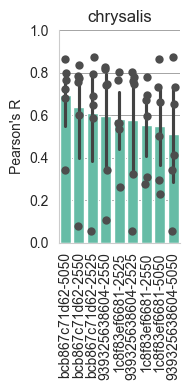

/tmp/ipykernel_6682/4162626443.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


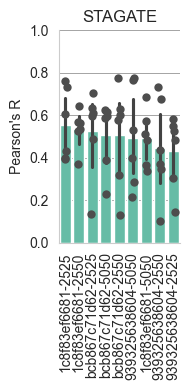

/tmp/ipykernel_6682/4162626443.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


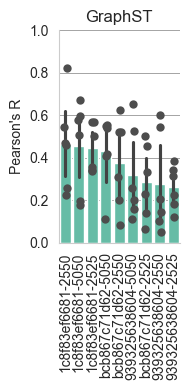

/tmp/ipykernel_6682/4162626443.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


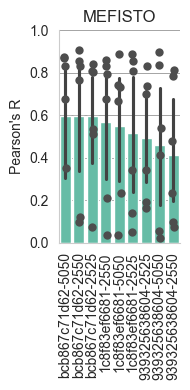

/tmp/ipykernel_6682/4162626443.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


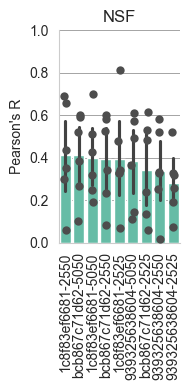

In [2]:
filepath = '/mnt/f/chrysalis/chrysalis_supplementary_data/I_synthetic_data/tabula_sapiens_immune_array_size'
adpaths = glob(filepath + '/*/*.h5ad')

meta_df = collect_metadata(adpaths)

method_suffix = {'chrysalis': 'chrysalis_', 'STAGATE': 'stagate_', 'GraphST': 'graphst_', 'MEFISTO': 'mefisto_', 'NSF': 'nsf_'}
method_df = pd.DataFrame()
method_df_mean = pd.DataFrame()
for name, suffix in method_suffix.items():
    csvs = glob(filepath + f'/*/{suffix}pearson.csv')
    df = collect_correlation_results(csvs)

    df_melted = df.melt(var_name='index', value_name='correlation')
    df_melted = df_melted.merge(meta_df, left_on='index', right_index=True, how='left')
    df_melted = df_melted.dropna()

    # for col in df_melted.columns:
    #     if len(df_melted[col].unique()) == 1:
    #         df_melted.drop(col,inplace=True,axis=1)

    df_melted['method'] = name
    method_df = pd.concat([method_df, df_melted], axis=0, ignore_index=True)

    mean_corr_df = pd.DataFrame(df.mean()).T
    mean_df_melted = mean_corr_df.melt(var_name='hash', value_name='correlation')
    mean_df_melted['index'] = mean_df_melted.index
    mean_df_melted = mean_df_melted.drop(columns=['hash'])
    mean_df_melted = mean_df_melted.merge(meta_df, left_on='index', right_index=True, how='left')

    mean_df_melted['method'] = name
    method_df_mean = pd.concat([method_df_mean, mean_df_melted], axis=0, ignore_index=True)

    # add arial font
    from matplotlib import font_manager

    font_files = mpl.font_manager.findSystemFonts()
    for font_file in font_files:
        font_manager.fontManager.addfont(font_file)
    # print(font_manager.get_font_names())

    df = df.rename(columns={k: v[:-5] for k, v in zip(meta_df.index, meta_df['hash'])})
    mean_corr = df.mean(axis=0).sort_values(ascending=False)
    plt.rcParams['svg.fonttype'] = 'none'
    fig, ax = plt.subplots(1, 1, figsize=(2, 4))
    sns.barplot(df, ax=ax, color='#57CBAD', order=mean_corr.index)
    sns.stripplot(df, ax=ax, size=6, color=".3", order=mean_corr.index)
    ax.grid(axis='y', linestyle='-', linewidth='0.5', color='grey')
    ax.set_axisbelow(True)
    ax.set_ylabel("Pearson's R")
    ax.set_xlabel(None)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_ylim((0, 1))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.title(name)
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_6682/1517267966.py:40: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:.3'` for the same effect.

  sns.stripplot(data=method_df_mean, x='spot_nr', y='correlation', hue='method',


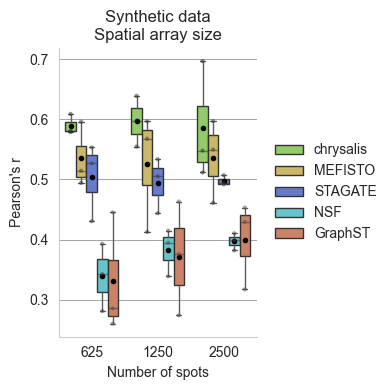

In [3]:
# lineplots
grid_keys = {'2525': '625', '2550': '1250', '5050': '2500'}
grids = []
for x in method_df_mean['hash']:
    for y in ['2525', '2550', '5050']:
        if y in x.split('-')[-1]:
            grids.append(grid_keys[y])
method_df_mean['spot_nr'] = grids

color_dict = {
    'chrysalis': '#91db57',
    'NSF': '#57d3db',
    'STAGATE': '#5770db',
    'MEFISTO': '#dbc257',
    'SpatialPCA': '#a157db',
    'GraphST': '#db7c57',
}
overall_mean = {}
for m in np.unique(method_df_mean['method']):
    v = method_df_mean.loc[method_df_mean['method'] == m, 'correlation'].mean()
    overall_mean[m] = v
overall_mean = pd.Series(overall_mean).sort_values(ascending=False)

# add arial font
import matplotlib.pyplot as plt
from matplotlib import font_manager

font_files = mpl.font_manager.findSystemFonts()
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
# print(font_manager.get_font_names())


plt.rcParams['svg.fonttype'] = 'none'
fig, (ax, ax_legend) = plt.subplots(1, 2, figsize=(4, 4), gridspec_kw={'width_ratios': [3, 1]})
sns.boxplot(data=method_df_mean, x='spot_nr', y='correlation', hue='method', palette=color_dict, showfliers=False,
            boxprops={'edgecolor': "0.2"}, medianprops={"color": "0.2", 'alpha': 0.5}, hue_order=overall_mean.index,
            showmeans=True, meanprops={'marker': '.', 'markerfacecolor': 'black', 'markeredgecolor': 'black'}, ax=ax)

sns.stripplot(data=method_df_mean, x='spot_nr', y='correlation', hue='method',
              size=3, color=".3", alpha=0.5,
              legend=False, jitter=False, dodge=True, hue_order=overall_mean.index, ax=ax)

ax.grid(axis='y', linestyle='-', linewidth='0.5', color='grey')
ax.set_axisbelow(True)
ax.set_ylabel("Pearson's r")
ax.set_xlabel("Number of spots")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Synthetic data\nSpatial array size')

ax.get_legend().remove()

ax_legend.axis('off')
handles, labels = ax.get_legend_handles_labels()
legend = ax_legend.legend(handles, labels, loc='center', frameon=False)
plt.tight_layout()
plt.show()
